In [361]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
import math
from collections import Counter
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud # word cloud

In [319]:
# save dataset as data
data = pd.read_csv("[Fillout] METU and Career Expectation Survey results.csv")

In [320]:
# Rename column headers
data.rename(columns = {
    "Submission ID": "submission_id",
    "Last updated": "last_updated",
    "Submission started": "submission_started",
    "Status": "status",
    "Current step": "current_step",
    "How old are you?": "age",
    "What is your gender?": "gender",
    "What is your department?": "department",
    "What is your current academic grade?": "academic_year",
    "Where do you currently live?": "current_residence",
    "Where do you prefer to study the most?": "study_preference",
    "What is your GPA?": "gpa",
    "On average, how many hours of sleep do you get per night?": "sleep_hours",
    "On average, how many hours per week do you spend on sports or physical activities?(Please enter a number)": "sport_hours",
    "How many cigarettes do you smoke on average per day?(If you don't smoke, please put 0)": "cigarettes_per_day",
    "How many cups of coffee do you drink per day?(Please enter a number)": "coffee_cups",
    "Please rate your department satisfaction": "department_satisfaction",
    "What are the biggest obstacles to your academic and/or professional development?": "development_obstacles",
    "How long do you expect it will take you to find a job after graduation?": "job_search_duration",
    "Do you plan to pursue further education after graduation?": "higher_education",
    "What type of work arrangement do you prefer after graduation?": "work_style",
    "Where do you plan to work after graduation?": "country_preference",
    "Do you plan to work in the public sector or the private sector after graduation?": "sector_preference",
    "Do you plan to work in your department’s field or in a different sector after graduation?": "field_preference",
    "In which city would you like to work after graduation?": "city_preference",
    "What is your expected monthly salary after graduation? (in thousands of Turkish Liras, e.g., 30 for 30.000 TRY)": "salary_expectation",
    "Errors": "errors",
    "Url": "url",
    "Network ID": "network_id"
}, inplace = True)

In [321]:
# drop unnecessary columns
df = data.drop(['last_updated', 'submission_started', 'status',
           'current_step', 'errors', 'url', 'network_id'], axis=1) 

In [322]:
# Data is ordered from the last survey to the first. Flip the data
df = df.sort_index(ascending=False).reset_index(drop=True).drop("submission_id", axis=1)
# Now the data is ordered from the first survey to the last.

In [323]:
df.columns

Index(['age', 'gender', 'department', 'academic_year', 'current_residence',
       'study_preference', 'gpa', 'sleep_hours', 'sport_hours',
       'cigarettes_per_day', 'coffee_cups', 'department_satisfaction',
       'development_obstacles', 'job_search_duration', 'higher_education',
       'work_style', 'country_preference', 'sector_preference',
       'field_preference', 'city_preference', 'salary_expectation'],
      dtype='object')

In [324]:
# Check the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      291 non-null    int64  
 1   gender                   291 non-null    object 
 2   department               291 non-null    object 
 3   academic_year            291 non-null    object 
 4   current_residence        291 non-null    object 
 5   study_preference         291 non-null    object 
 6   gpa                      291 non-null    object 
 7   sleep_hours              291 non-null    object 
 8   sport_hours              285 non-null    float64
 9   cigarettes_per_day       288 non-null    float64
 10  coffee_cups              284 non-null    float64
 11  department_satisfaction  291 non-null    int64  
 12  development_obstacles    234 non-null    object 
 13  job_search_duration      291 non-null    object 
 14  higher_education         2

In [325]:
# Correct the data types
conversion_dic = {
    "gender": "category",
    "department": "category",
    "academic_year": "category",
    "current_residence": "category",
    "study_preference": "category",
    "gpa": "category",
    "sleep_hours": "category",
    "job_search_duration": "category",
    "higher_education": "category",
    "work_style": "category",
    "country_preference": "category",
    "sector_preference": "category",
    "field_preference": "category",
}

df = df.astype(conversion_dic)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      291 non-null    int64   
 1   gender                   291 non-null    category
 2   department               291 non-null    category
 3   academic_year            291 non-null    category
 4   current_residence        291 non-null    category
 5   study_preference         291 non-null    category
 6   gpa                      291 non-null    category
 7   sleep_hours              291 non-null    category
 8   sport_hours              285 non-null    float64 
 9   cigarettes_per_day       288 non-null    float64 
 10  coffee_cups              284 non-null    float64 
 11  department_satisfaction  291 non-null    int64   
 12  development_obstacles    234 non-null    object  
 13  job_search_duration      291 non-null    category
 14  higher_edu

In [326]:
anomality_dic = {} 
for i, col in enumerate(df.select_dtypes(["category", "object"])):
    if df[col].str.contains("\n").any():
        anomality_dic[col] = True
    else:
        anomality_dic[col] = False

anomality_dic

{'gender': True,
 'department': True,
 'academic_year': False,
 'current_residence': True,
 'study_preference': True,
 'gpa': False,
 'sleep_hours': True,
 'development_obstacles': True,
 'job_search_duration': True,
 'higher_education': False,
 'work_style': False,
 'country_preference': True,
 'sector_preference': False,
 'field_preference': False,
 'city_preference': False}

In [328]:
for key, value in anomality_dic.items():
    if key == "development_obstacles":
        continue
    elif key == "city_preference" and value == True:
        df[key] = df[key].str.rstrip("\n")
    elif value == True:
        df[key] = df[key].str.rstrip("\n").astype("category")

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      291 non-null    int64   
 1   gender                   291 non-null    category
 2   department               291 non-null    category
 3   academic_year            291 non-null    category
 4   current_residence        291 non-null    category
 5   study_preference         291 non-null    category
 6   gpa                      291 non-null    category
 7   sleep_hours              291 non-null    category
 8   sport_hours              285 non-null    float64 
 9   cigarettes_per_day       288 non-null    float64 
 10  coffee_cups              284 non-null    float64 
 11  department_satisfaction  291 non-null    int64   
 12  development_obstacles    234 non-null    object  
 13  job_search_duration      291 non-null    category
 14  higher_edu

In [331]:
# Check if the dataframe is clean of \n's
check_list = []

for i, col in enumerate(df.select_dtypes(["category", "object"])):
    if col == "development_obstacles": # devolepment_obstacle is not important
        continue
    if df[col].str.contains("\n").any():
        check_list.append(True)
    else:
        check_list.append(False)

any(check_list) 

False

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      291 non-null    int64   
 1   gender                   291 non-null    category
 2   department               291 non-null    category
 3   academic_year            291 non-null    category
 4   current_residence        291 non-null    category
 5   study_preference         291 non-null    category
 6   gpa                      291 non-null    category
 7   sleep_hours              291 non-null    category
 8   sport_hours              285 non-null    float64 
 9   cigarettes_per_day       288 non-null    float64 
 10  coffee_cups              284 non-null    float64 
 11  department_satisfaction  291 non-null    int64   
 12  development_obstacles    234 non-null    object  
 13  job_search_duration      291 non-null    category
 14  higher_edu

In [334]:
# Fill missing values with blank values.
df["sport_hours"].fillna(0, inplace=True)
df["coffee_cups"].fillna(0, inplace=True)
df["cigarettes_per_day"].fillna(0, inplace=True)
df["development_obstacles"].fillna("None", inplace=True)
df["city_preference"].fillna("None", inplace=True)

# work_style and field_preference contain na values
df.dropna(subset=["work_style", "field_preference"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 290
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      289 non-null    int64   
 1   gender                   289 non-null    category
 2   department               289 non-null    category
 3   academic_year            289 non-null    category
 4   current_residence        289 non-null    category
 5   study_preference         289 non-null    category
 6   gpa                      289 non-null    category
 7   sleep_hours              289 non-null    category
 8   sport_hours              289 non-null    float64 
 9   cigarettes_per_day       289 non-null    float64 
 10  coffee_cups              289 non-null    float64 
 11  department_satisfaction  289 non-null    int64   
 12  development_obstacles    289 non-null    object  
 13  job_search_duration      289 non-null    category
 14  higher_edu

In [340]:
# Fill missing salaries with the department average.

# Create a custom function
def salary_imputer(row):
    if pd.isna(row["salary_expectation"]):
        dep = row["department"]
        dep_salary_mean = round(df.loc[df["department"] == dep, "salary_expectation"].mean(), 2)
        row["salary_expectation"] = dep_salary_mean
    return row["salary_expectation"]

df["salary_expectation"] = df.apply(salary_imputer, axis=1)

In [341]:


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 290
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      289 non-null    int64   
 1   gender                   289 non-null    category
 2   department               289 non-null    category
 3   academic_year            289 non-null    category
 4   current_residence        289 non-null    category
 5   study_preference         289 non-null    category
 6   gpa                      289 non-null    category
 7   sleep_hours              289 non-null    category
 8   sport_hours              289 non-null    float64 
 9   cigarettes_per_day       289 non-null    float64 
 10  coffee_cups              289 non-null    float64 
 11  department_satisfaction  289 non-null    int64   
 12  development_obstacles    289 non-null    object  
 13  job_search_duration      289 non-null    category
 14  higher_edu

In [342]:
# There are turkish characters. Some answers should be joined too.
df["city_preference"] = df["city_preference"].str.title().str.strip().apply(unidecode)
df["city_preference"].value_counts()

Ankara                                                                          106
Istanbul                                                                         34
None                                                                             19
Sirnak                                                                            6
Izmir                                                                             6
                                                                               ... 
Antalya-Izmir                                                                     1
Dublin                                                                            1
I Didnt Decide, Job Is More Important Than The City                               1
In Turkey Ankara, But Im Planning To Move To Australia                            1
In Turkey, Izmir. In A Different Country, Depends On The Country And The Job      1
Name: city_preference, Length: 93, dtype: int64

In [372]:
df.to_csv("Cleaned Data.csv")

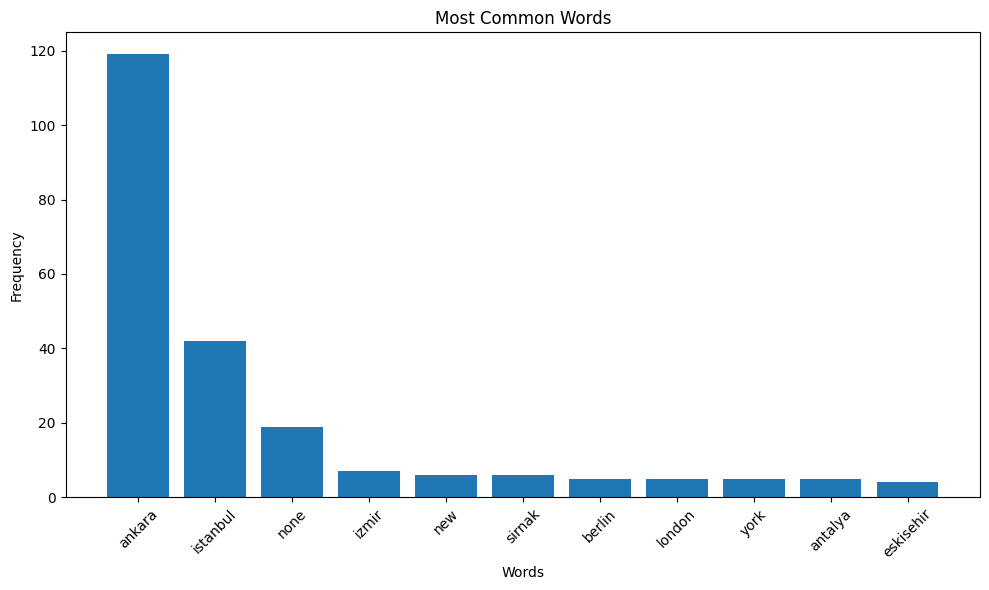

In [357]:
# Check Preferred cities

# Count words
stop_words = set(stopwords.words('english'))

words = ' '.join(df['city_preference'].astype(str)).lower().split()
words = [word for word in words if word not in stop_words]

word_freq = Counter(words).most_common(11)  # Top 10 Words
# word_freq = {k:v for k, v in Counter(words).items() if v >= 2}

# Create lists for plotting
words, counts = zip(*word_freq)
# words = word_freq.keys()
# counts = word_freq.values()

# Remove stopwords
# nltk.download('stopwords') I used nltk for the first time

# counts = [count for word, count in zip(words, counts) if word not in stop_words]


# Plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

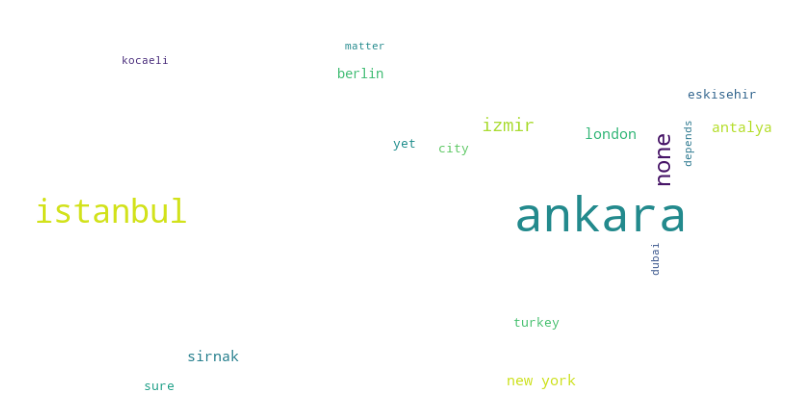

In [371]:
# Word Cloud
w = ' '.join(df['city_preference'].astype(str)).lower().split()
w = [word for word in w if word not in stop_words]
w = " ".join(w)



# Create wordcloud
# wordcloud = WordCloud(
#     width=800, 
#     height=400,
#     background_color='white'
# ).generate(text)

wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis',
    min_font_size=10,
    max_font_size=50
).generate(w)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [359]:
df["country_preference"].value_counts()

Open to both    147
Abroad           73
Turkey           50
Not sure yet     19
Name: country_preference, dtype: int64

In [ ]:
df.groupby("department")["gender"].value_counts()